In [1277]:
# Modules we will need
import config
import datetime as DT
import twitter
import pandas as pd
import numpy as np


# Variables we will need
api = twitter.Api(consumer_key = config.api_key, consumer_secret = config.api_key_secret, access_token_key = config.access_token, access_token_secret = config.access_secret)
today = DT.date.today()
week_ago = today - DT.timedelta(days = 7)
static_search = 'q=load shedding karachi'
blamed_list = ['Karachi Electric', 'Imran Khan', 'Asad Umar', 'NEPRA', 'Sui Gas', 'Naeem Rehman', 'Omar Ayub Khan', 'Tehreeki Insaaf']
name_set_list = [karachi_electric_set, imran_khan_set, asad_umar_set, nepra_set, sui_set, naeem_rehman_set, omar_ayub_khan_set, PTI_set]
blamer_set = set.union(*name_set_list)

In [1278]:
# Set up the functions that we will need.

def name_setter(search):
    '''Returns set of twitter usernames who tweeted specified search criteria using GetSearch raw_query.  Contains no duplicates.'''
    name_set = {tweet.user.screen_name for tweet in search}
    return name_set

def name_set_length_lister(name_set_list):
    '''Returns a list of the lengths of a passed iterable.'''
    name_set_length_list = [len(name_set) for name_set in name_set_list]
    return name_set_length_list

def name_mbr_test(name_set_list, names):
    '''Returns dictionary of membership tests between two iterables.'''
    name_dict = {}
    for name in names:
        if name in name_set_list:
            name_dict[name] = True           
        else:
            name_dict[name] = False
    return name_dict    

In [1279]:
# Search criteria for Karachi load shedding.  To be cleaned up.

ke_search = api.GetSearch(raw_query = f'{static_search} #KE until%3A{today} since%3A{week_ago}&count=100')
KElectricPk_search = api.GetSearch(raw_query = f'{static_search} %40KElectricPk until%3A{today} since%3A{week_ago}&count=100')
imran_khan_search = api.GetSearch(raw_query = f'{static_search} %40ImranKhanPTI until%3A{today} since%3A{week_ago}&count=100')
asad_umar_search = api.GetSearch(raw_query = f'{static_search} %40Asad_Umar until%3A{today} since%3A{week_ago}&count=100')
nepra_search = api.GetSearch(raw_query = f'{static_search} #NEPRA until%3A{today} since%3A{week_ago}&count=100')
sui_search = api.GetSearch(raw_query = f'{static_search} sui until%3A{today} since%3A{week_ago}&count=100')
naeem_rehman_search = api.GetSearch(raw_query = f'{static_search} %40NaeemRehmanEngr until%3A{today} since%3A{week_ago}&count=100')
omar_ayub_khan_search = api.GetSearch(raw_query = f'{static_search} %40OmarAyubKhan until%3A{today} since%3A{week_ago}&count=100')
PTI_government_search = api.GetSearch(raw_query = f'{static_search} #PTI_government until%3A{today} since%3A{week_ago}&count=100')

In [1280]:
# Take twitter user names for all of the searches
ke_set = name_setter(ke_search)
KElectricPk_set = name_setter(KElectricPk_search)
karachi_electric_set = ke_set.union(KElectricPk_set)
imran_khan_set = name_setter(imran_khan_search)
asad_umar_set = name_setter(asad_umar_search)
nepra_set = name_setter(nepra_search)
sui_set = name_setter(sui_search)
naeem_rehman_set = name_setter(naeem_rehman_search)
omar_ayub_khan_set = name_setter(omar_ayub_khan_search)
PTI_set = name_setter(PTI_government_search)

In [1281]:
# Find the length of the name_set_list
name_set_lengths = name_set_length_lister(name_set_list)

# Create a dictionary of the blamed entities and the number of times each entity is blamed
blamed_dict = dict(zip(blamed_list, name_set_lengths))
print(blamed_dict)

{'Karachi Electric': 25, 'Imran Khan': 2, 'Asad Umar': 3, 'NEPRA': 14, 'Sui Gas': 68, 'Naeem Rehman': 2, 'Omar Ayub Khan': 1, 'Tehreeki Insaaf': 14}


In [1282]:
# Turn the set into a list
blame_list = list(blamer_set)


# Membership tests for all name sets
karachi_electric_blame_test = name_mbr_test(list(karachi_electric_set), blame_list)
imran_khan_blame_test = name_mbr_test(list(imran_khan_set), blame_list)
asad_umar_blame_test = name_mbr_test(list(asad_umar_set), blame_list)
nepra_blame_test = name_mbr_test(list(nepra_set), blame_list)
sui_blame_test = name_mbr_test(list(sui_set), blame_list)
naeem_rehman_blame_test = name_mbr_test(list(naeem_rehman_set), blame_list)
omar_ayub_khan_blame_test = name_mbr_test(list(omar_ayub_khan_set), blame_list)
PTI_blame_test = name_mbr_test(list(PTI_set), blame_list)

# Make sure we are getting a dictionary back
print(type(karachi_electric_blame_test))

# Make a list of all blame tests
blame_test_list = [karachi_electric_blame_test, imran_khan_blame_test, asad_umar_blame_test,\
                   nepra_blame_test, sui_blame_test, naeem_rehman_blame_test, omar_ayub_khan_blame_test, PTI_blame_test]


<class 'dict'>


In [1283]:
# Create a pandas Series out of the dictionary
times_blamed = pd.Series(blamed_dict)
times_blamed

Karachi Electric    25
Imran Khan           2
Asad Umar            3
NEPRA               14
Sui Gas             68
Naeem Rehman         2
Omar Ayub Khan       1
Tehreeki Insaaf     14
dtype: int64

In [1284]:
# Print the total and average of the times_blamed Series
print(f'The total times all entities in the dataset have been blamed for load shedding in Karachi, Pakistan is {sum(times_blamed)}.')
print(f'The average number of times the entities in the dataset have been blamed for load shedding in Karachi, Pakistan is {np.mean(times_blamed)}.')


The total times all entities in the dataset have been blamed for load shedding in Karachi, Pakistan is 129.
The average number of times the entities in the dataset have been blamed for load shedding in Karachi, Pakistan is 16.125.


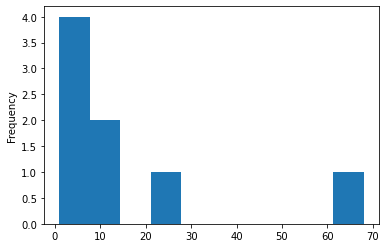

In [1285]:
# Plot a histogram of the times_blamed Series
times_blamed.plot.hist()

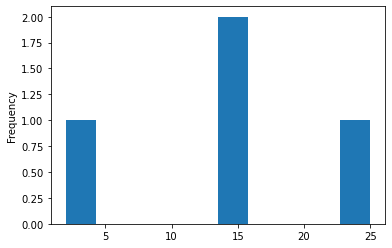

In [1286]:
# Drop a few rows of the times_blamed Series to make it more normalized
normalized_times_blamed = times_blamed.drop(['Sui Gas', 'Asad Umar', 'Omar Ayub Khan', 'Naeem Rehman'])
normalized_times_blamed.plot.hist()


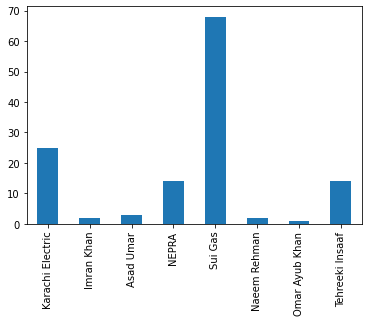

In [1287]:
# Plot a bar chart for the times_blamed Series
times_blamed.plot.bar(legend = False)

In [1288]:
# Create a dataframe out of the membership tests
karachi_ls_df = pd.DataFrame(blame_test_list, index = blamed_list)
karachi_ls_df.columns = ['Tweeter' + str(x) for x in range(0, len(karachi_ls_df.columns))]
karachi_ls_df

,Tweeter0,Tweeter1,Tweeter2,Tweeter3,Tweeter4,Tweeter5,Tweeter6,Tweeter7,Tweeter8,Tweeter9,...,Tweeter84,Tweeter85,Tweeter86,Tweeter87,Tweeter88,Tweeter89,Tweeter90,Tweeter91,Tweeter92,Tweeter93
Karachi Electric,True,True,False,True,False,False,True,True,False,False,...,False,False,False,False,True,True,False,False,False,True
Imran Khan,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
Asad Umar,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
NEPRA,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
Sui Gas,False,False,True,False,True,False,False,False,True,False,...,True,True,True,True,False,False,True,True,True,False
Naeem Rehman,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Omar Ayub Khan,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Tehreeki Insaaf,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [1289]:
sample_karachi_ls_df = karachi_ls_df.sample(n=10, axis=1)

In [1290]:
unique_sample = np.unique(sample_karachi_ls_df, return_counts = True)
print(unique_sample)

(array([False,  True]), array([66, 14], dtype=int64))


[Text(0, 0.5, 'Occurences in sample'), Text(0.5, 0, 'True/False')]

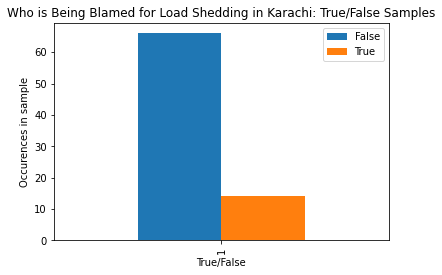

In [1291]:
unique_sample_df = pd.DataFrame(unique_sample)
unique_sample_df.rename(columns=unique_sample_df.iloc[0], inplace = True) 
unique_sample_df.drop([0], inplace = True)
ax = unique_sample_df.plot.bar(title = 'Who is Being Blamed for Load Shedding in Karachi: True/False Samples')
ax.set(xlabel = 'True/False', ylabel = 'Occurences in sample')